In [32]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
</style>""")

# TD_01_1 : Structures de données

## Exercice I : Notation postfixe

L'écriture des expressions arithmétiques nécessite souvent l'emploi de parenthèses. Par exemple:
$$9 + 4 * (7 + 2) * (4 + 5)$$
La notation **postfixe** ou **notation polonaise inverse** permet d'écrire de façon non ambiguë les formules arithmétiques sans utiliser de parenthèses. L'expression précédente en notation polonaise inverse devient:
$$ 9\ 4\ 7\ 2\ +\ *\ 4\ 5\ +\ *\ +$$


Dérivée de la notation polonaise utilisée pour la première fois en 1924 par le mathématicien polonais **Jan Łukasiewicz**, la NPI a été inventée par le philosophe et informaticien australien **Charles Leonard Hamblin** dans le milieu des années 1950, pour permettre les calculs sans faire référence à une quelconque adresse mémoire.

À la fin des années 1960, elle a été diffusée dans le public comme interface utilisateur avec les calculatrices de bureau de Hewlett-Packard (HP-9100), puis avec la calculatrice scientifique HP-35 en 1972. [source](https://fr.wikipedia.org/wiki/Notation_polonaise_inverse)


Une expression en NPI est évaluée de la gauche vers la droite. Dès qu'un opérateur est rencontré, il est appliqué aux deux opérandes immédiatement à sa gauche. Le résultat remplace alors l'operation dans l'expression postfixe et on pousuit l'évaluation.
Ainsi l'expression precedente devient:
$$ 9\ 4\ 7\ 2\ +\ *\ 4\ 5\ +\ *\ +$$
$$ 9\ 4\ 9\ *\ 4\ 5\ +\ *\ +$$
$$ 9\ 36\ 4\ 5\ +\ *\ +$$
$$ 9\ 36\ 9\ *\ +$$
$$ 9\ 324\ +$$
$$ 333$$
A la fin, si l'expression est valide, il ne reste qu'une valeur numérique dans l'expression qui est le résultat.


1. Comment s'écrit (3 + (4 + (5 + (6 + (7 + (8 + 9)))))) en NPI ?

3 4 5 6 7 8 9 + + + + + +

On considère l'expression en NPI suivante: <span style="border:1px solid black; padding:3px;">**3 4 5 6 7 8 9 + + + + + +**</span>. Cette expression est donnée sous forme d'une liste, les valeurs chiffrées seront de type **int** et les opérateurs rentrés comme les chaînes de caractère **"+"**.
2. Entrer dans une variable L la liste décrite précédemment.

In [4]:
# question 2
L = [3, 4, 5, 6, 7, 8, 9, "+", "+", "+", "+", "+", "+"]

3. Ecrire les fonctions **init, isEmpty, push et pop** permettant d'avoir un comportement de pile. Vous ajouterez aussi une fonction **top** permettant de lire l'élément au sommet de la pile sans la modifier.

In [5]:
# question 3
def init():
    return []

def isEmpty(s):
    return s == []

def push(val,s):
    s.append(val)
    
def pop(s):
    return s.pop()

def top(s):
    return s[-1]

4. Ecrire une fonction **evalue** qui prend comme argument une liste comme décrit ci-dessus. Cette fonction doit:
    - initialiser une **pile** pour le calcul
    - balayer la liste de gauche à droite
    - lorsqu'on rencontre une valeur chiffrée, on l'empile
    - lorsqu'on rencontre un opérateur, on dépile deux éléments, on calcule et on empile le résultat.
    - renvoyer le résultat final

In [6]:
# question 4
def evalue(l):
    pile = init()
    for val in l:
        if type(val) == int:
            push(val,pile)
        else:
            b = pop(pile)
            a = pop(pile)
            commande = str(a)+val+str(b)
            reponse = eval(commande)
            push(reponse,pile)
    return pop(pile)
        

In [7]:
# On essaye avec la liste d'entrée précédente:
L = [3, 4, 5, 6, 7, 8, 9, "+", "+", "+", "+", "+", "+"]
evalue(L)

42

In [8]:
# Et avec celle du début
L = [9, 4, 7, 2, "+", "*", 4, 5, "+", "*", "+"]
evalue(L)

333

In [9]:
# Ca marche aussi avec d'autres opérateurs:
L = [26, 2, 10, "**", "+", 50, "//"]
evalue(L)

21

## Exercice 2 : Le labyrinthe

Un labyrinthe est dit parfait si:
- il existe un chemin menant de tout point du labyrinthe à tout autre
- et si ce chemin est unique.

Nous allons construire de tels labyrinthes de manière aléatoire en utilisant une structure de pile.


Un labyrinthe sera représenté par un rectangle de largeur **l** et de hauteur **h** contenant **$l \times h$** cases carrées blanches ou noires. Une case blanche représentant un chemin et une case noire représentant un mur.


Nous travaillerons d'abord sur une matrice contenant uniquement des **1** (cases blanches) et des **0** (cases noires). puis dans un deuxième temps sur l'affichage.



1. Ecrire une fonction **init** qui prend comme arguments deux entiers **l** et **h** et qui renvoie la matrice correspondante contenant uniquement des 0.

In [38]:
def init2(l=51,h=51):
    return [[0 for i in range(l)] for j in range(h)]


2. Ecrire une fonction **blanchir** qui prend comme paramètre deux arguments, la carte et un couple d'entier correspondant aux coordonnées de la case à blanchir.

In [39]:
def blanchir(carte, coord):
    x,y = coord
    carte[y][x] = 1

3. Ecrire une fonction **estBlanc** qui prend comme paramètre deux arguments, la carte et un couple d'entier correspondant aux coordonnées de la case testée. Cette fonction doit renvoyer un booléen. Si la case considérée est hors de la carte, elle doit renvoyer True.

In [40]:
def estBlanc(carte, coord):
    x,y = coord
    if x < 0 or y < 0 or y>=len(carte) or x >=len(carte[0]):
        return True
    return carte[y][x] == 1

4. Ecrire une fonction **voisins** qui prend comme paramètre la carte courante et les coordonnées d'une case. Cette fonction doit renvoyer la liste des couples de coordonnées des cases encore noires à une distance de 2 cases de la case considérée.

In [41]:
def voisins(carte, coord):
    x,y = coord
    l = []
    for dx,dy in [(-2,0), (2,0), (0,-2), (0,2)]:
        if not estBlanc(carte,(x+dx,y+dy)):
            l.append((x+dx,y+dy))
    return l

def voisins2(carte, coord):
    x,y = coord
    l = []
    if not estBlanc(carte,(x-2,y)):
        l.append((x-2,y))
    if not estBlanc(carte,(x+2,y)):
        l.append((x+2,y))
    if not estBlanc(carte,(x,y-2)):
        l.append((x,y-2))
    if not estBlanc(carte,(x,y+2)):
        l.append((x,y+2))
    return l

5. Ecrire une fonction **milieu** qui prend comme paramètre les coordonnées de deux cases séparées par une seule et qui renvoie les coordonnées de cette case.

In [42]:
def milieu(coord1,coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    x, y = (x1 + x2)//2, (y1 + y2)//2
    return (x, y)

6. Ecrire une fonction **choix** qui prend comme argument une liste de cases et qui en renvoie une prise au hasard. Vous pourrez utiliser la bibliothèque **random** ainsi que sa documentation accessible avec la fonction **help** afin de choisir la bonne fonction.

In [43]:
from random import choice, randint

def choix(l):
    return choice(l)

def choix2(l):
    return l[randint(0,len(l)-1)]

L'algorithme utilise une structure de pile:
1. On initialise une structure de pile vide
2. On initialise une matrice ne contenant que des cases noires de dimension $l \times h$
2. Les coordonnées de la case de départ (1,1) sont empilées et on blanchit cette case
3. tant que la pile est non vide
    * On fait la liste des cases accessibles à 2 cases de distance
    * Si la liste est vide
        * on dépile la case et on reprend à l'étape 4.
    * sinon
        * On en prend une case au hasard dans cette liste
        * On détermine les coordonnées de la case du milieu (entre celle tirée au hasard et la case courante)
        * On blanchit les 2 cases
        * On empile la case et on reprend à l'étape 4.
4. On tire au hasard deux cases de la forme (0,2n+1) (2n+1,0) (l-1,2n+1) ou (2n+1,h-1) pour servir d'entrée et de sortie
4. On renvoie la carte terminée


Voici ce que cela donne dans une petite animation afin de mieux comprendre
![test gif](laby.gif)

7. Implémentez cet algorithme en python dans une fonction **maze**

In [44]:
# question 7
def maze(l,h):
    data = [] # etape 1.
    carte = init2(l,h) # etape 2.
    data.append((1,1)) # etape 3.
    blanchir(carte,(1,1)) # etape 3.
    while data != []: # etape 4.
        lv = voisins(carte,data[-1]) # etape 4.1
        if lv == []: # condition 4.2
            data.pop() # 4.2.1
        else: # condition 4.3
            coord = choix(lv) # 4.3.1
            coord2 = milieu(data[-1],coord) # 4.3.2
            blanchir(carte,coord) # 4.3.3
            blanchir(carte,coord2) # 4.3.3
            data.append(coord) # 4.3.4
    #etape 5.
    entree_sortie = [(0,2*i+1) for i in range(h//2)]
    entree_sortie += [(2*i+1,0) for i in range(l//2)]
    entree_sortie += [(l-1,2*i+1) for i in range(h//2)]
    entree_sortie += [(2*i+1,h-1) for i in range(l//2)]
    entree = choix(entree_sortie)
    sortie = choix(entree_sortie)
    while entree == sortie:
        sortie = choix(entree_sortie)
    blanchir(carte,entree)
    blanchir(carte,sortie)
    return carte # etape 6.

Voici quelques lignes de code pour tester votre fonction et afficher l'image correspondante, vous pouvez ajuster l et h mais gardez bien un nombre impair! L'affichage doit changer à chaque appel du bloc car un nouveau labyrinthe aléatoire est généré. Vous pourrez même récupérer le fichier image si vous le souhaitez.

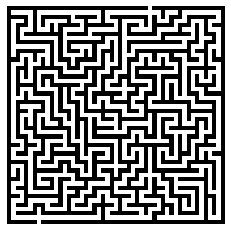

In [45]:
import matplotlib.pyplot as plt
im = plt.imshow(maze(51,51),interpolation='none')
im.set_cmap('gray')
plt.axis(False)
plt.savefig('monlabyrinthe.png')
plt.show()

## Exercice 3 : Suite de l'exercice 2 pour les plus rapides

8. Ecrire une fonction **solve** qui prend comme argument une carte de labyrinthe (comme la renvoie la fonction maze). Cette fonction devra résoudre le labirynthe et construire une image sur laquelle la solution apparait.

In [118]:
def marquer(carte, coord): # Marquer la case comme atteinte appartenant au chemin actif
    x,y = coord
    carte[y][x] = 2
    
def liberer(carte, coord): # Marquer la case comme atteinte mais hors du chemin actif
    x,y = coord
    carte[y][x] = 3
    
def es(carte): # Renvoie les coordonnées de l'entrée et de la sortie du labyrinthe
    l = len(carte[0])
    h = len(carte)
    e_s = []
    for i in range(1,l,2):
        if carte[0][i] == 1:
            e_s.append((i, 0))
        if carte[h-1][i] == 1:
            e_s.append((i, h-1))
    for i in range(1,h,2):
        if carte[i][0] == 1:
            e_s.append((0, i))
        if carte[i][l-1] == 1:
            e_s.append((l-1, i))
    return tuple(e_s)

def voisins3(carte, coord): # Cherche les voisins à une case de distance
    x,y = coord
    l = []
    for dx,dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        if estBlanc2(carte,(x+dx,y+dy)):
            l.append((x+dx,y+dy))
    return l

def estBlanc2(carte, coord): # On cherche les cases blanches, l'exterieur est considéré comme un mur
    x,y = coord
    if x < 0 or y < 0 or y>=len(carte) or x >=len(carte[0]):
        return False
    return carte[y][x] == 1

def solve(carte): # Renvoie la carte sur laquelle la solution est marquée
    e, s = es(carte)
    pile = []
    pile.append(e)
    marquer(carte,e)
    courante = pile[-1]
    while pile[-1] != s:
        lv = voisins3(carte, courante)
        if lv == []:
            pile.pop()
            liberer(carte,courante)
            courante = pile[-1]
        else:
            courante = choix(lv)
            pile.append(courante)
            marquer(carte,courante)
    return carte


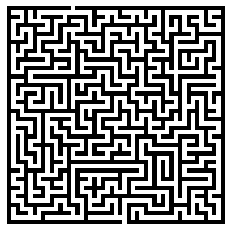

In [126]:
# Le labyrinthe généré
carte = maze(51,51)
im = plt.imshow(carte,interpolation='none')
im.set_cmap('gray')
plt.axis(False)
plt.show()

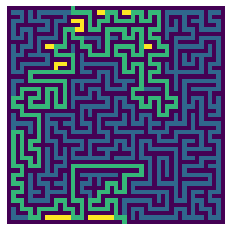

In [127]:
# Recherche de solution
# en jaune les cases balayées inutilement
# en vert la solution
carte = solve(carte)
im = plt.imshow(carte,interpolation='none')
plt.axis(False)
plt.show()

9. Ecrire une fonction **save** qui prend comme entrée une carte et qui construit un fichier texte contenant:
largeur espace hauteur sur la première ligne (c'est l'entête)
Des 0 et des 1 ensuite représentant les données à partir de la deuxième ligne. 
    - les 0 et les 1 devront être collés sans espace. 
    - Vous pourrez changer de ligne n'importe quand, il n'est pas obligatoire d'écrire une ligne du labyrinthe par ligne de fichier
La fonction devra sauvegarder votre fichier avec un nom raisonnable

In [48]:
def save(carte):
    f = open("carte.txt","w")
    f.write("{} {}\n".format(len(carte[0]),len(carte)))
    compteur = 0 # servira à limiter les lignes à 80 caractères affichés
    for i in range(len(carte)):
        for j in range(len(carte[0])):
            if compteur == 80:
                f.write("\n")
                compteur = 0
            f.write(str(carte[i][j]))
            compteur += 1
    f.close()

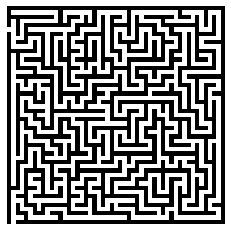

In [49]:
# Creation d'une carte et sauvegarde dans un fichier.
# La carte ets affichée pour comparer à la carte après lecture du fichier
carte = maze(51,51)
save(carte)
im = plt.imshow(carte,interpolation='none')
im.set_cmap('gray')
plt.axis(False)
plt.show()

10. Ecrire une fonction **read** qui prend comme entrée le nom (avec extension!) d'un fichier labyrinthe sous forme d'une chaine de caractères. Votre fonction devra lire le fichier et renvoyer une carte sous forme de matrice (opération inverse de la fonction save).

In [52]:
def read(file):
    f = open(file, "r")
    entete = f.readline()
    entete = entete.strip().split(" ")
    l,h = entete
    carte = init2(int(l),int(h))
    for i in range(len(carte)):
        for j in range(len(carte[0])):
            val = f.read(1)
            while val!= "0" and val != "1":
                val = f.read(1)
            carte[i][j] = int(val)
    f.close()
    return carte

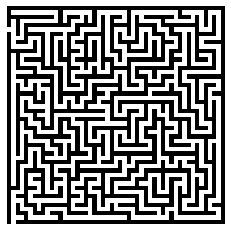

In [53]:
# Lecture du fichier carte.txt et tracé de la carte obtenue
carte = read("carte.txt")
im = plt.imshow(carte,interpolation='none')
im.set_cmap('gray')
plt.axis(False)
plt.show()

11. Construire un fichier labyrinthe, échanger ces fichiers labyrinthes avec un autre élève du groupe, lire le fichier (éventuellement corriger votre fonction **read**) et résoudre le labyrinthe.